# MUSIC GENRE CLASSIFICATION USING ANN and CNN
## Name : Aditya Sahani
## College : Indian Institute of Technology, Jodhpur

## Dataset : https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

 99% 1.20G/1.21G [00:11<00:00, 138MB/s]
100% 1.21G/1.21G [00:11<00:00, 109MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/gtzan-dataset-music-genre-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,BatchNormalization,Dropout

In [ ]:
df = pd.read_csv("/content/Data/features_30_sec.csv")

In [ ]:
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [ ]:
df1 = pd.read_csv("/content/Data/features_3_sec.csv")

In [ ]:
df1

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [ ]:
import librosa

In [ ]:
data, sampling_rate = librosa.load('/content/Data/genres_original/blues/blues.00000.wav')

In [ ]:
mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40)
print(mfccs.shape)

(40, 1293)


In [ ]:
data

array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
       -0.06106567, -0.06417847], dtype=float32)

In [ ]:
import os
import pandas as pd
import librosa
import glob
import matplotlib.pyplot as plt

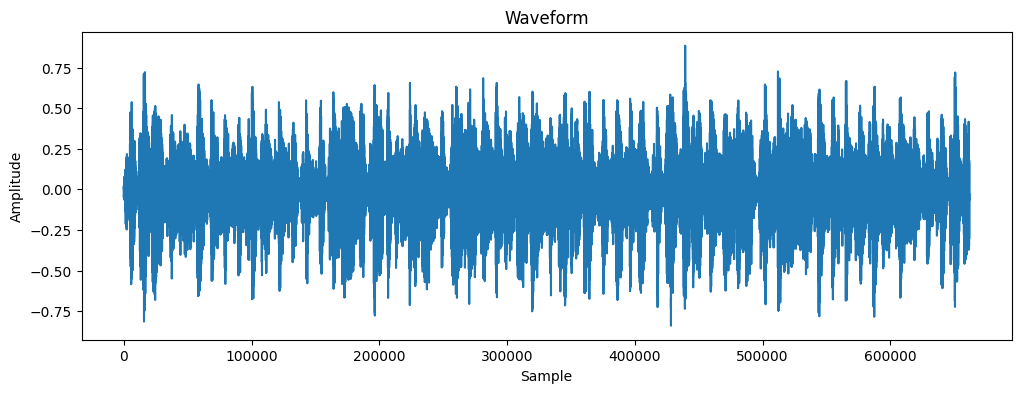

In [ ]:
## displaying the waveform for "Blues" Class

plt.figure(figsize=(12, 4))
plt.plot(data)
plt.title('Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()


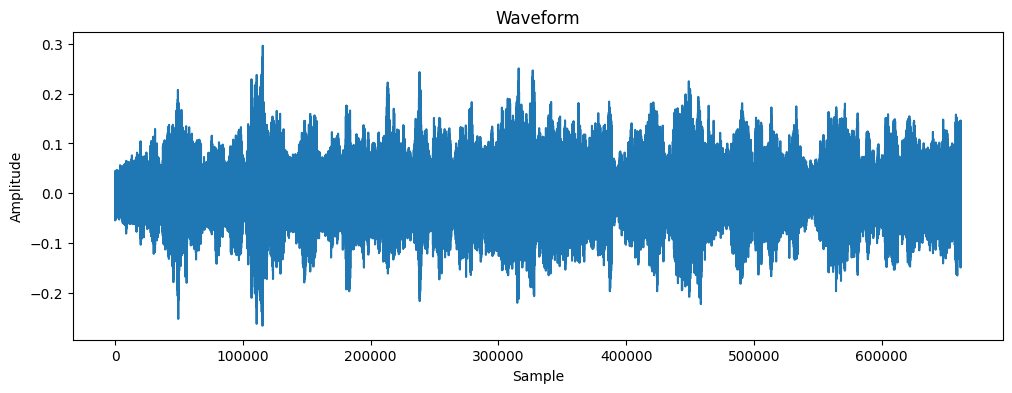

In [ ]:
# Displaying the waveform for the "Classical" Class
data, sampling_rate = librosa.load('/content/Data/genres_original/classical/classical.00004.wav')

# Plot the waveform
plt.figure(figsize=(12, 4))
plt.plot(data)
plt.title('Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
data.shape

(661794,)

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
ipd.Audio("/content/Data/genres_original/classical/classical.00004.wav")

In [ ]:
## function to extract the coefficients from the audio array
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

In [ ]:
import os
import librosa


parent_dir = '/content/Data'

genres_dir = os.path.join(parent_dir, 'genres_original')

# List of class names
class_names = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Dictionary to store audio data classwise
audio_data = {}

# Fixed duration for loading each audio file (in seconds)
fixed_duration = 2

# Loop through each class folder
for class_name in class_names:
    # Create an empty list to store audio data for the current class
    class_audio_data = []

    # Define the path to the current class folder
    class_dir = os.path.join(genres_dir, class_name)

    # Loop through each audio file in the class folder
    for filename in os.listdir(class_dir):
        # Check if the file is a .wav file
        if filename.endswith('.wav'):
            # Load the audio file using librosa with fixed duration
            file_path = os.path.join(class_dir, filename)
            try:

                data = features_extractor(file_path)
                class_audio_data.append(data)
            except Exception as e:
                print(f"Error loading audio file: {file_path}. Error: {e}")

    # Store the audio data for the current class in the dictionary
    audio_data[class_name] = class_audio_data


<ipython-input-22-a52d55e6a5dd>:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading audio file: /content/Data/genres_original/jazz/jazz.00054.wav. Error: 


In [ ]:
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [ ]:
import pandas as pd


class_dict = audio_data

# Initialize an empty list to store dictionaries
data = []

# Iterate through the dictionary
for label, arrays in class_dict.items():
    for array in arrays:
        data.append({'class': label, 'array': array})

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(data)

In [ ]:
df.head()

,class,array
0,blues,"[-27.024075, 107.31879, -46.839245, 40.927616,..."
1,blues,"[-144.92339, 95.732994, -21.616442, 49.62627, ..."
2,blues,"[-82.52998, 94.16451, -27.112604, 75.65927, -2..."
3,blues,"[-301.70804, 111.53328, 21.896053, 16.15057, 8..."
4,blues,"[-89.39791, 93.79924, -14.558413, 54.38949, -3..."


In [ ]:
df.shape

(999, 2)

In [ ]:
shuffled_df = df.sample(frac=1, random_state=42)  # Set random_state for reproducibility
shuffled_df.reset_index(drop=True, inplace=True)  # Reset the index of the shuffled DataFrame

In [ ]:
shuffled_df.shape

(999, 2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(shuffled_df["class"])

In [ ]:
y.shape

(999,)

In [ ]:
X = shuffled_df.drop(columns=["class"])

In [ ]:
X = X.values

In [ ]:
X.shape

(999, 1)

In [ ]:
shuffled_df.head()

,class,array
0,hiphop,"[-140.10194, 77.09097, 42.042377, 31.247862, 1..."
1,pop,"[-39.89364, 35.581356, 8.926843, 15.078342, 15..."
2,country,"[-164.78546, 123.44315, 4.2247305, 48.800877, ..."
3,disco,"[-189.154, 93.94435, 7.849922, 41.894196, -7.1..."
4,pop,"[-44.98689, 69.775894, 11.840672, 8.117906, 12..."


In [ ]:
import numpy as np


array_list = []

for index, row in shuffled_df.iterrows():
    array = row[1]  # Extract the array from the row
    array_list.append(array)

# Convert the list of arrays into a 2D NumPy array
result_array_2d = np.vstack(array_list)

# Print the 2D array
print(result_array_2d)


[[-140.10194      77.09097      42.042377   ...   -1.4257152
     0.522426     -0.559922  ]
 [ -39.89364      35.581356      8.926843   ...   -5.0079017
    -3.0850186    -2.6038115 ]
 [-164.78546     123.44315       4.2247305  ...    2.4844074
     6.6598883     3.094175  ]
 ...
 [-251.33118     105.8357        2.1622968  ...   -1.1986327
    -2.6453626    -1.1336545 ]
 [ -88.141426     77.38236     -19.072306   ...   -2.8079166
    -0.44903606   -1.7471848 ]
 [-299.62308     157.25868     -37.329967   ...   -2.8922846
    -5.138249     -5.4940724 ]]


In [ ]:
result_array_2d.shape

(999, 40)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
result_array_2d = ss.fit_transform(result_array_2d)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(result_array_2d, y, test_size = 0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [ ]:
## SupportVectorMachine Classifier
dtc = SVC(kernel="rbf")

In [ ]:
dtc.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.65

In [ ]:
## RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=30)

In [ ]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.61

In [ ]:
## XGBoost Classifier
import xgboost as xgb
xg = xgb.XGBClassifier(n_estimators=50)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
accuracy_score(y_test, y_pred)

0.635

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(BatchNormalization())
model.add(Dense(128, activation="relu", input_dim=X_train.shape[1]))
# model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
# model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
# model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))

model.add(Dropout(0.1))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=[X_test, y_test])

Epoch 1/50
25/25 [==============================] - 2s 13ms/step - loss: 2.2980 - accuracy: 0.1189 - val_loss: 2.2227 - val_accuracy: 0.2150
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 2.1634 - accuracy: 0.2115 - val_loss: 2.0898 - val_accuracy: 0.2550
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 2.0385 - accuracy: 0.2628 - val_loss: 1.9429 - val_accuracy: 0.3150
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 1.9282 - accuracy: 0.3179 - val_loss: 1.8159 - val_accuracy: 0.3200
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 1.8344 - accuracy: 0.3242 - val_loss: 1.7399 - val_accuracy: 0.3500
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 1.7764 - accuracy: 0.3342 - val_loss: 1.6877 - val_accuracy: 0.3650
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 1.6700 - accuracy: 0.3842 - val_loss: 1.6121 - val_accuracy: 0.4050
Epoch 8/50
25/25 [=

# Convolutional Neural Network (CNN)
## Training CNN on Mel Spectrogram of Audio file

### Mel Spectrogram : A Mel spectrogram is a visual representation of the spectrum of a sound signal, where the frequency axis is converted from a linear scale (Hertz) to the mel scale, which approximates the human auditory system's perception of pitch. It displays the intensity of different frequencies of a signal over time, often used in audio processing tasks such as speech recognition and music analysis.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
# Load audio file
audio_file = '/content/Data/genres_original/blues/blues.00000.wav'
y, sr = librosa.load(audio_file)

# Compute the Mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# Display the Mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding="valid"))

model.add(Conv2D(32, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding="valid"))

model.add(Conv2D(16, kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding="valid"))

model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.1))


model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 batch_normalization_1 (Bat  (None, 254, 254, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      18464     
                                                                 
 batch_normalization_2 (Bat  (None, 252, 252, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 250, 250, 16)      4624      
                                                                 
 batch_normalization_3 (Bat  (None, 250, 250, 16)     

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Data/images_original',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 999 files belonging to 10 classes.


In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10, batch_size=32)

Epoch 1/10
32/32 [==============================] - 550s 17s/step - loss: 48.4655 - accuracy: 0.1081
Epoch 2/10
32/32 [==============================] - 475s 15s/step - loss: 2.3205 - accuracy: 0.1011
Epoch 3/10
32/32 [==============================] - 446s 14s/step - loss: 2.3028 - accuracy: 0.0901
Epoch 4/10
32/32 [==============================] - 444s 14s/step - loss: 2.3029 - accuracy: 0.0921
Epoch 5/10
32/32 [==============================] - 444s 14s/step - loss: 2.3028 - accuracy: 0.1001
Epoch 6/10
32/32 [==============================] - 437s 14s/step - loss: 2.3029 - accuracy: 0.0971
Epoch 7/10
32/32 [==============================] - 443s 14s/step - loss: 2.3028 - accuracy: 0.1021
Epoch 8/10
32/32 [==============================] - 440s 14s/step - loss: 2.3028 - accuracy: 0.1001
Epoch 9/10
32/32 [==============================] - 434s 14s/step - loss: 2.3028 - accuracy: 0.1011
Epoch 10/10
32/32 [==============================] - 434s 14s/step - loss: 2.3028 - accuracy: 0.103

In [ ]:
## Getting an accuracy of : {}

# Artificial Neural Network (ANN)

In [ ]:
## reading the data
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('/content/Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

<ipython-input-16-902b78f0250f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl', legend=False);


Text(0, 0.5, 'BPM')

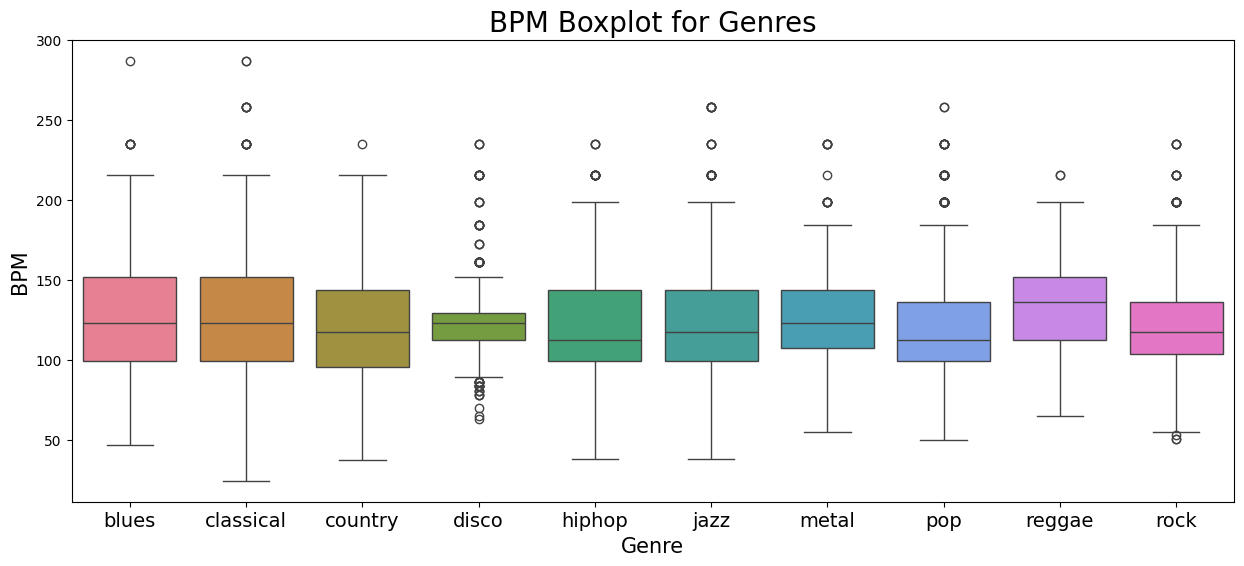

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

x = df[["label", "tempo"]]  ## box-plot of the Beats/ Minute

fig, ax = plt.subplots(figsize=(15, 6));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl', legend=False);

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)

In [ ]:
data = df.drop(columns=["filename", "length"])

In [ ]:
X = data.drop(columns=["label"]).values

In [ ]:
le = LabelEncoder()

In [ ]:
y = le.fit_transform(data["label"])

In [ ]:
# y = data["label"].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
## writing the model

model = Sequential()

model.add(BatchNormalization())
model.add(Dense(512, activation="relu", input_dim=X.shape[1]))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Dense(256, activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))

# model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
callback  = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=[X_test, y_test])

Epoch 1/20
250/250 [==============================] - 5s 20ms/step - loss: 0.3429 - accuracy: 0.8778 - val_loss: 0.4242 - val_accuracy: 0.8544
Epoch 2/20
250/250 [==============================] - 2s 9ms/step - loss: 0.3046 - accuracy: 0.8963 - val_loss: 0.3886 - val_accuracy: 0.8799
Epoch 3/20
250/250 [==============================] - 2s 6ms/step - loss: 0.2554 - accuracy: 0.9139 - val_loss: 0.3912 - val_accuracy: 0.8864
Epoch 4/20
250/250 [==============================] - 2s 7ms/step - loss: 0.2237 - accuracy: 0.9200 - val_loss: 0.4068 - val_accuracy: 0.8809
Epoch 5/20
250/250 [==============================] - 2s 6ms/step - loss: 0.1980 - accuracy: 0.9298 - val_loss: 0.3826 - val_accuracy: 0.8859
Epoch 6/20
250/250 [==============================] - 2s 6ms/step - loss: 0.1792 - accuracy: 0.9362 - val_loss: 0.3641 - val_accuracy: 0.8969
Epoch 7/20
250/250 [==============================] - 2s 9ms/step - loss: 0.1732 - accuracy: 0.9416 - val_loss: 0.3904 - val_accuracy: 0.8954
Epoch

In [ ]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 3ms/step


In [ ]:
y_pred

array([6, 4, 8, 6, 2, 6, 7, 5, 4, 5, 6, 5, 1, 6, 1, 5, 5, 4, 2, 7, 1, 8,
       4, 7, 2, 7, 2, 4, 1, 8, 2, 5, 0, 5, 5, 7, 1, 2, 7, 5, 9, 2, 2, 0,
       8, 8, 8, 4, 3, 1, 9, 2, 7, 8, 5, 9, 6, 1, 2, 1, 0, 9, 5, 7, 8, 5,
       9, 6, 7, 1, 5, 5, 8, 6, 2, 4, 1, 1, 3, 4, 5, 3, 7, 3, 2, 0, 1, 3,
       5, 2, 1, 5, 4, 1, 2, 3, 2, 8, 5, 7, 9, 2, 8, 4, 5, 4, 9, 1, 6, 7,
       0, 2, 6, 7, 5, 9, 8, 5, 2, 3, 5, 8, 7, 3, 1, 5, 9, 3, 6, 3, 2, 1,
       0, 8, 3, 8, 0, 6, 1, 9, 1, 9, 9, 3, 5, 9, 0, 6, 1, 3, 8, 7, 7, 2,
       4, 0, 4, 2, 5, 2, 7, 6, 4, 2, 3, 9, 5, 3, 8, 9, 1, 4, 9, 8, 4, 8,
       4, 0, 6, 3, 2, 0, 4, 8, 2, 8, 5, 8, 5, 8, 7, 5, 6, 2, 5, 2, 3, 0,
       0, 3])

In [ ]:
y_test

array([6, 9, 8, 6, 9, 6, 7, 5, 4, 2, 6, 0, 1, 6, 1, 0, 5, 4, 2, 2, 1, 4,
       9, 8, 2, 7, 2, 3, 1, 8, 2, 2, 0, 4, 1, 2, 4, 2, 7, 5, 3, 8, 2, 0,
       4, 4, 8, 6, 0, 1, 2, 2, 7, 8, 5, 9, 9, 1, 2, 1, 0, 9, 5, 7, 8, 1,
       6, 6, 7, 1, 0, 5, 8, 6, 9, 3, 5, 1, 3, 4, 5, 3, 7, 4, 2, 0, 1, 3,
       5, 3, 1, 5, 4, 1, 6, 4, 5, 8, 1, 8, 0, 2, 2, 4, 8, 0, 6, 1, 6, 7,
       0, 9, 6, 7, 5, 9, 8, 1, 2, 3, 5, 8, 7, 2, 5, 5, 0, 3, 6, 0, 2, 1,
       0, 3, 2, 4, 0, 6, 1, 2, 1, 6, 9, 4, 2, 2, 0, 6, 1, 3, 8, 9, 7, 9,
       4, 0, 4, 1, 5, 0, 7, 6, 4, 2, 3, 9, 8, 0, 8, 9, 1, 8, 6, 4, 3, 8,
       4, 0, 6, 3, 5, 0, 8, 0, 2, 8, 2, 9, 5, 8, 7, 8, 6, 2, 0, 5, 3, 0,
       0, 3])

In [ ]:
accuracy_score(y_test, y_pred)

0.635